In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns',200)
pd.set_option('display.width',400)

In [2]:
df0 = pd.read_csv('Clean Data1.csv')

In [3]:
df0.head(2)

Unnamed: 0  loan_amnt  funded_amnt_inv        term  int_rate installment grade sub_grade  emp_length home_ownership  annual_inc verification_status  issue_d  loan_status      purpose addr_state   dti  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  month  year loan_amt_range int_rate_range annual_inc_range dti_range
0           0       5000          4975.00   36 months     10.65         low     B        B2          10           RENT    24000.00            Verified  12-2011            0  credit_card         AZ 27.65                85               1         3        0       83.70          9     12  2011         0-5000        10-12.5          0-25000      25+%
1           1       2500          2500.00   60 months     15.27         low     C        C4           0           RENT    30000.00     Source Verified  12-2011            1          car         GA  1.00                99               5         3        0        9.40          4     12  2011         0-5000            15+      25000-50000      0-5%

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33732 entries, 0 to 33731
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           33732 non-null  int64  
 1   loan_amnt            33732 non-null  int64  
 2   funded_amnt_inv      33732 non-null  float64
 3   term                 33732 non-null  object 
 4   int_rate             33732 non-null  float64
 5   installment          33732 non-null  object 
 6   grade                33732 non-null  object 
 7   sub_grade            33732 non-null  object 
 8   emp_length           33732 non-null  int64  
 9   home_ownership       33732 non-null  object 
 10  annual_inc           33732 non-null  float64
 11  verification_status  33732 non-null  object 
 12  issue_d              33732 non-null  object 
 13  loan_status          33732 non-null  int64  
 14  purpose              33732 non-null  object 
 15  addr_state           33732 non-null 

## Categorical Features:

* Term
* Installment
* Grade
* Sub-grade
* Employemeent length (emp_length)
* Home ownership
* Verification status
* Purpose
* Address state
* inq_last_6_months - Categorical+continuous
* month
* Year
* Loan Amount range
* Interest rate range
* Annual income range


## Continuous Features

* Loan Amount
* Funded amount
* Interest rate
* Emp length
* Annual Income
* Issue Date
* Address state
* dti
* earliest credit line
* open_acc
* pub_rec
* inq_last_6_months
* revol_util
* total_acc

In [5]:
def plotUnivariateCount(feature,data=df0,figsize=(10,7),rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature] == fd]
        feature_count = len(feature_filter[feature_filter['loan_status'] == 1])
        feature_values.append(feature_count*100/feature_filter['loan_status'].count())
        
    plt.bar(feature_dimension,feature_values,color='blue',edgecolor='white')
    plt.title('Loan Defaults wrt '+str(feature)+' feature- CountPlot \n',fontdict={'fontsize':18,'color':'red'})
    plt.xlabel(feature,fontdict={'fontsize':14,'color':'brown'})
    plt.ylabel('defaulter %',fontdict={'fontsize':14,'color':'brown'})
    plt.show()

In [6]:
def plotUnivariateBar(x,figsize=(10,7)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', data=df0)
    plt.title('Loan defaults wrt '+str(x)+' feature- CountPlot \n', fontdict={'fontsize':18,'color':'red'})
    plt.xlabel(x,fontdict={'fontsize':14,'color':'brown'})
    plt.ylabel('defaulter ratio',fontdict={'fontsize':14,'color':'brown'})
    plt.show()

# 1. Univariate Analysis

## a. Categorical Variables

### Term

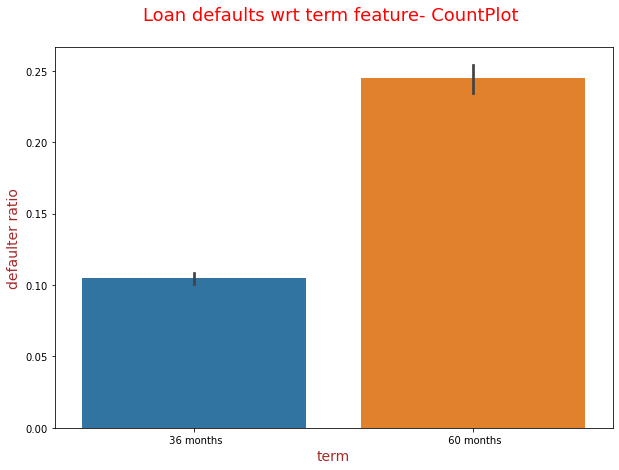

In [7]:
## check for defaulters wrt term of loan:
plotUnivariateBar('term')

From the above graph we can see that defaulters rate is increasing with increase in loan term, hence chances of loan getting defaulted for 36m is less than 60m.

* term -> YES

### Installment

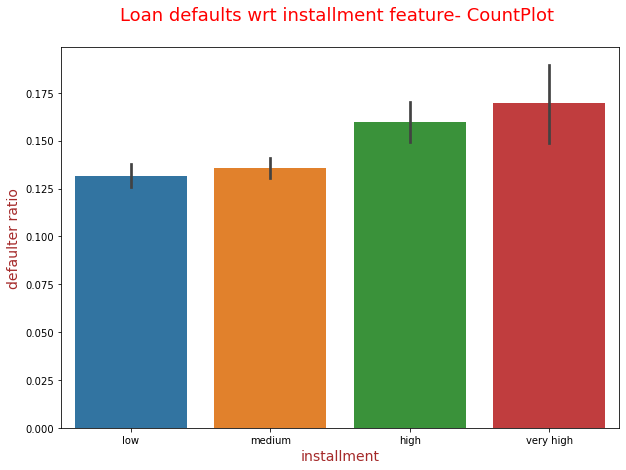

In [8]:
## check for defaulters wrt installment amount:
plotUnivariateBar('installment')

From the above graph we can see that defaulter ratio increases with the increase in the installment amounts. So there are higher chances of loan getting default when installment amount is high.

* Installment -> YES

### Grade

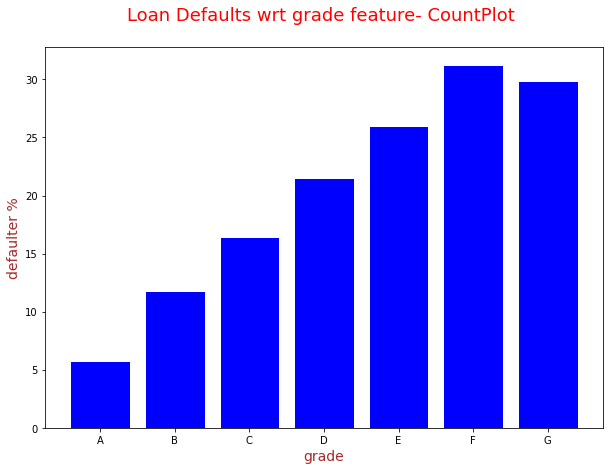

In [9]:
## check for defaulters wrt grade
plotUnivariateCount('grade')

From the above graph for grade we can infer that the defaulters % is increasing wrt grade. Hence chance of loan getting defaulted increases as we go from A to G.

* grade -> YES

### Sub-grade

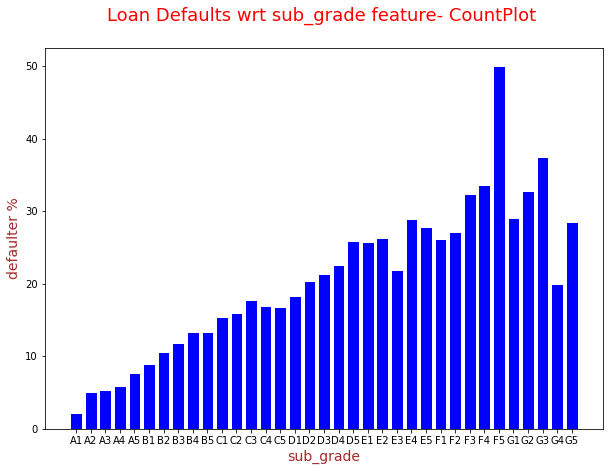

In [10]:
## check for defaulters wrt sub-grade of the loan:
plotUnivariateCount('sub_grade')

From the above plot we can see that the chances of loan getting defaulted increases as we move from A1 to G5.

* Sub-grade -> YES

### Employement Length

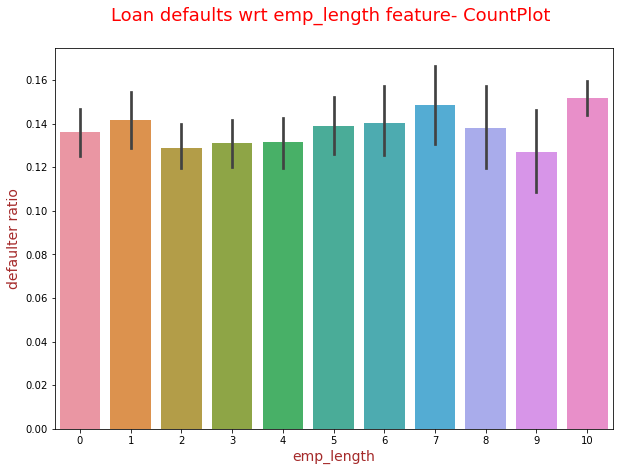

In [11]:
## check for defaulters wrt employement length
plotUnivariateBar('emp_length')

Here as we can see from the plot that there is no specific relation between defaulters and employement length.

* emp_length -> NO

### Home Ownership

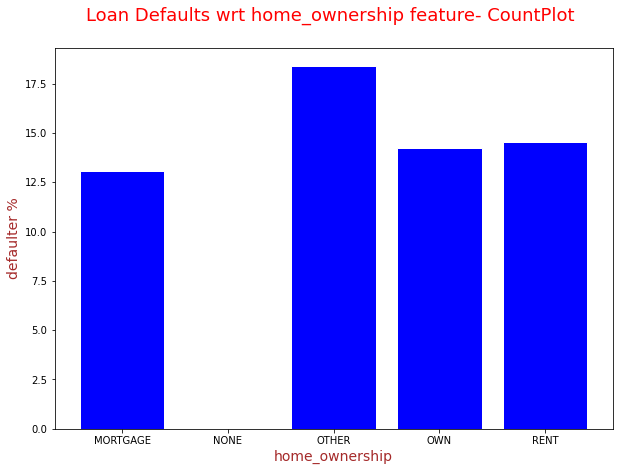

In [12]:
## check for defaulters wrt home_ownership
plotUnivariateCount('home_ownership')

From the plot we can infer that defaulter rate is pretty much constant wrt home ownership. It is quite high for OTHERS, but it is too vague to decide. So we will not take it for our analysis.

* home_ownership -> NO

### Verification status

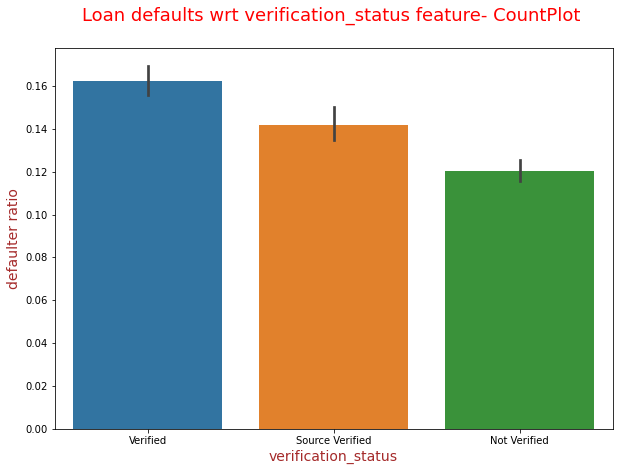

In [13]:
## check for defaulters wrt verification status
plotUnivariateBar('verification_status')

From the plot we can see that defaulter rate is high for Verified customers and low for Not verified one's.

* verification_status -> YES

### Purpose

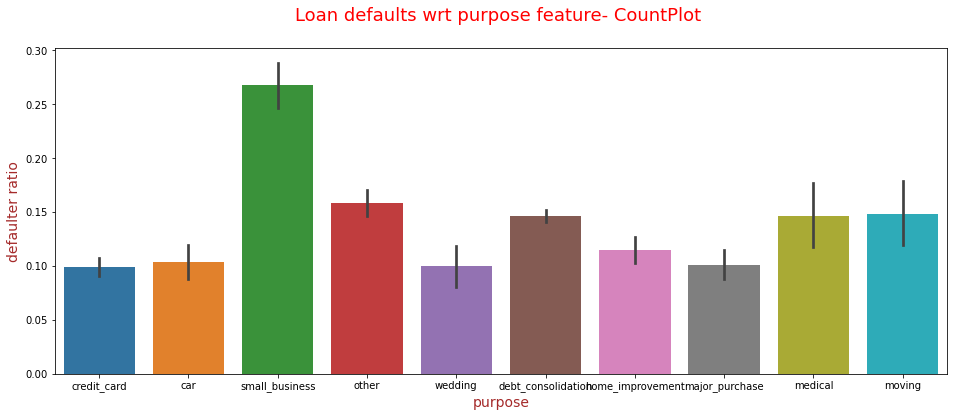

In [14]:
## check for defaulters wrt purpose of loan
plotUnivariateBar('purpose', figsize=(16,6))

Here we can see that defaulters ratio is nearly same for each purpose but it is very high for type 'small_business'. Hence default rate will depend on the purpose of loan.

* purpose -> YES

### Address State

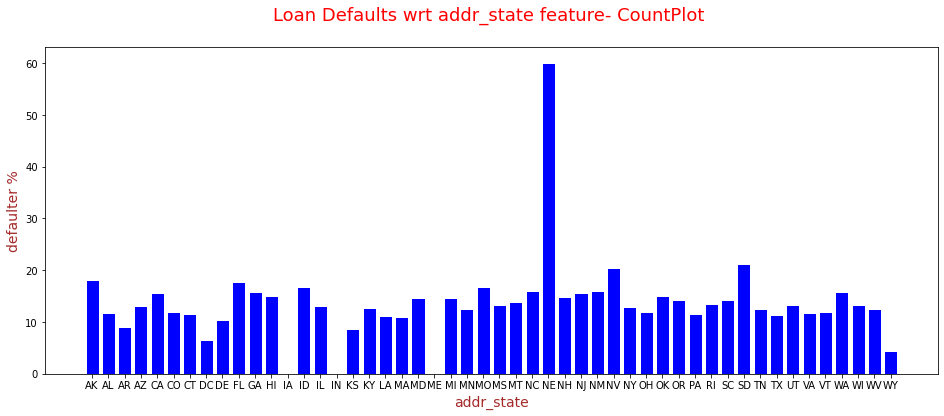

In [15]:
## check for defaulters wrt address state
plotUnivariateCount('addr_state',figsize=(16,6))

From the plot we can see that defaulter % is nearly constant for every state except for 'NE', but we cannot use it in our analysis. Hence defaulter rate will not depend on Address state.

* addr_state -> NO

### Number of inquiries in past 6 months

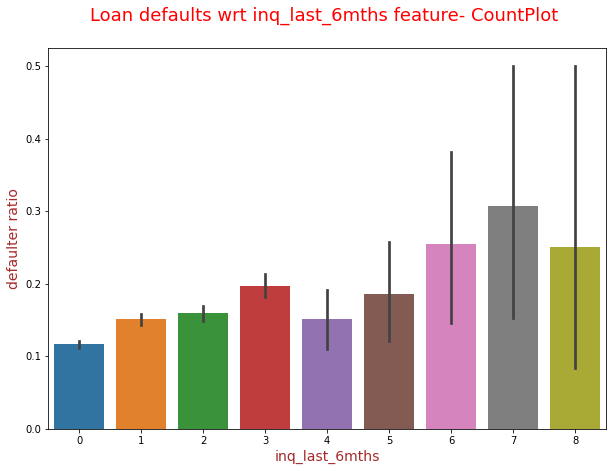

In [16]:
## check for defaulter ratio wrt inq_past_6_months
plotUnivariateBar('inq_last_6mths')

Here from the plot we can infer that defaulter rate is not consistently increasing wrt inq_last_6mths , Hence we cannot use it in our analysis.

* inq_last_6mths -> NO

### Month

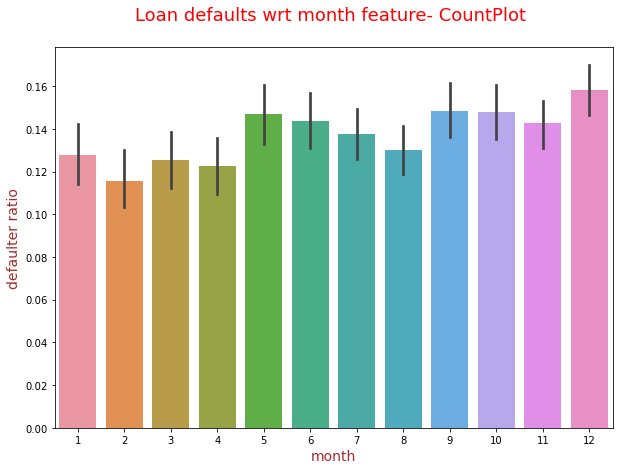

In [17]:
## check for defaulter rate wrt month in which loan was funded
plotUnivariateBar('month')

Here From the above plot we can see that defaulter rate is nearly same wrt the month in which loan was funded. Hence not so usefull parameter.

* month -> NO

### Year

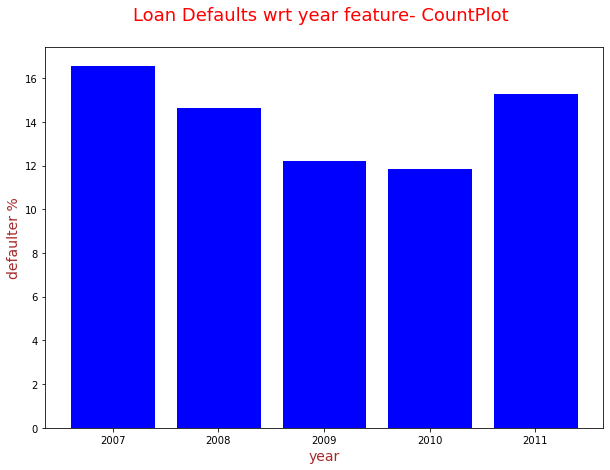

In [18]:
## check for loan defaulters wrt year in which loan was funded
plotUnivariateCount('year')

From the above plot we can see that defaulter % is nearly constant wrt Year, it is just in range of 12-16%. Hence we cannot use it in our analysis.

* Year -> NO

### Loan Amount range

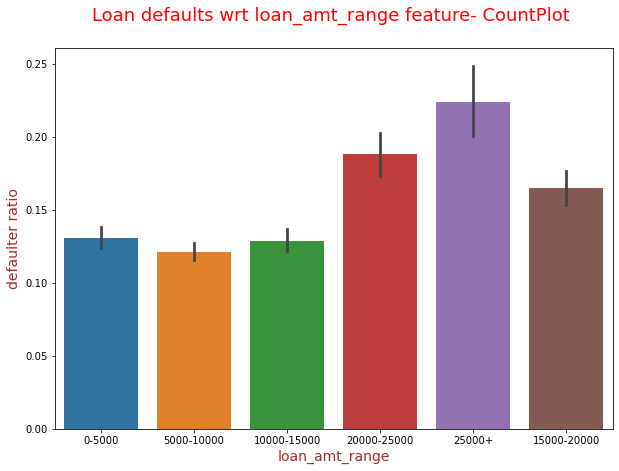

In [19]:
## check for defaulters wrt loan amount range 
plotUnivariateBar('loan_amt_range')

Here we can see that defaulters rate increases with the increase in the loan amount range, hence it will depend on this feature.

* loan_amt_range -> YES

### Interest rate range

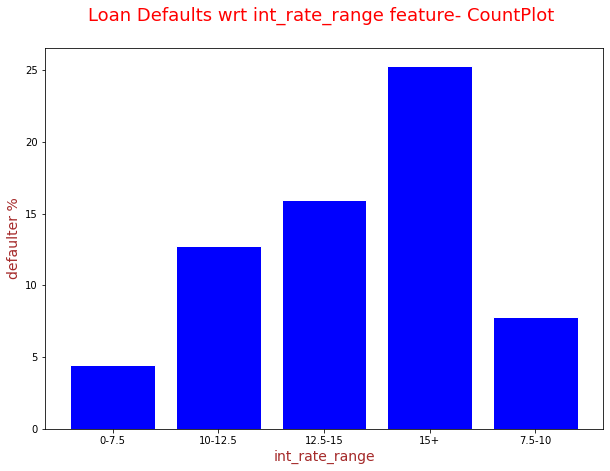

In [20]:
## check for defaulters wrt int_rate_range
plotUnivariateCount('int_rate_range')

From the plot we can see that defaulter % is increasing with the increase in interest rate range consistently. Hence, it will depend on this feature.

* int_rate_range -> YES

### Annual Income range

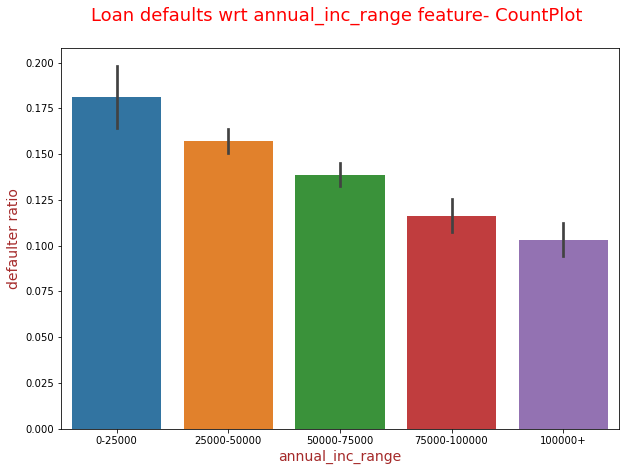

In [21]:
## check for defaulters wrt annual income ranges
plotUnivariateBar('annual_inc_range')

Here we can see that defaulters rate decreases with increase in the annual income range. Hence it will depend on this feature.

* annual_inc_range -> YES

### dti range

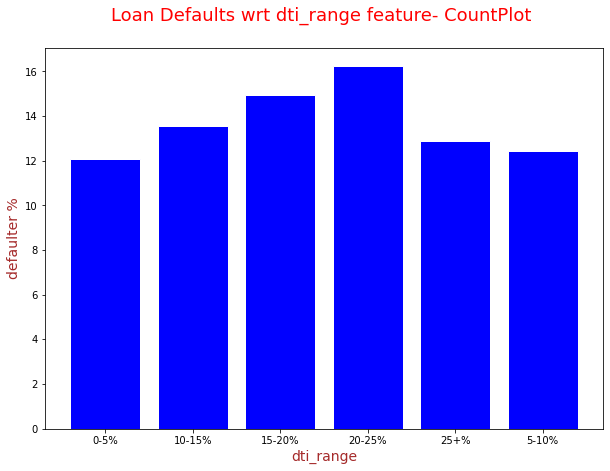

In [22]:
## check for defaulters wrt dti_range
plotUnivariateCount('dti_range')

Here we can infer that defaulters ratio is increasing with increase in dti_range, hence it will depend on dti_range feature.

* dti_range -> YES

## b. Continuous Features

### Number of open credit lines

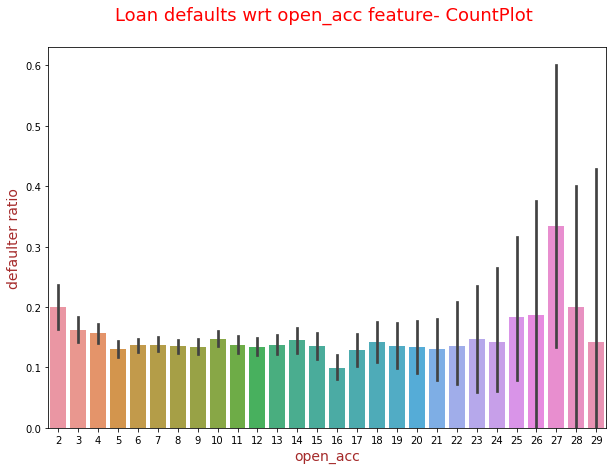

In [23]:
## check for defaulters ratio wrrt number of open credit lines
plotUnivariateBar('open_acc')

Here we can infer from the plot that defaulters ratio is nearly constant for all open_acc values. Hence rate does not depend on open_acc

* open_acc -> NO

### Revolving line utilization rate

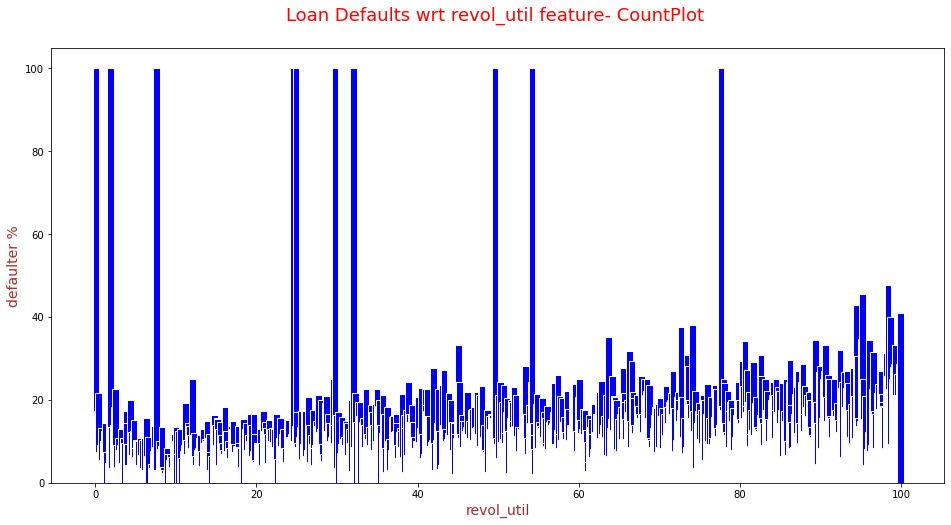

In [24]:
## check for the defaulters wrt revol_util 
plotUnivariateCount('revol_util' , figsize=(16,8))

Here we see that there are some fluctuations where some have complete 100% ratio for defaulting and is increasing in a pattern. Hence we can say there may be some relation between the two.

* revol_util -> YES

### Total number of credit lines

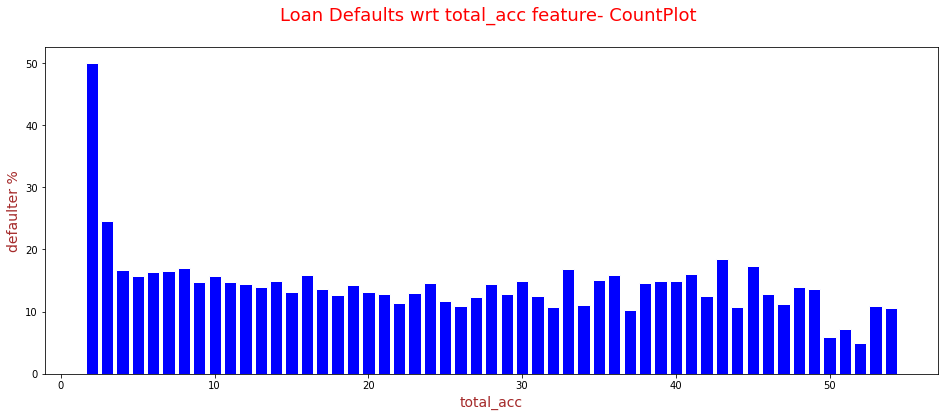

In [25]:
## check for defaulters wrt total_acc 
plotUnivariateCount('total_acc', figsize=(16,6))

Here we can infer that defaulter ratio is mostly constant in all ranges. Hence there is no relation seen between the two.

* total_acc -> NO

### Address state of the customer

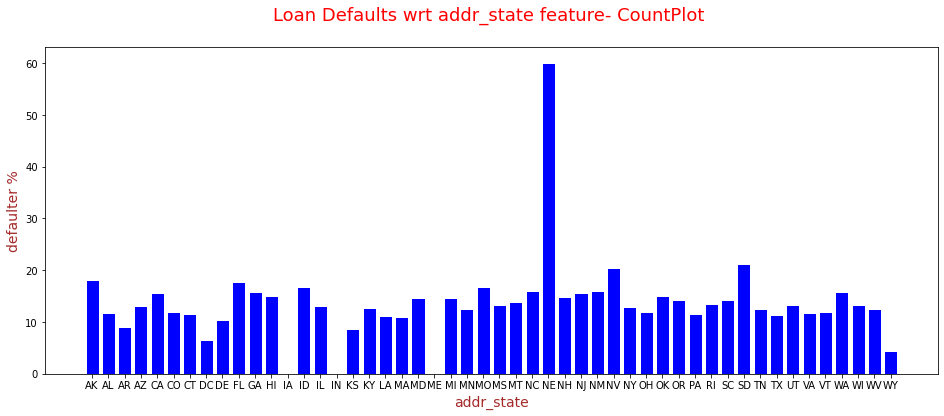

In [59]:
plotUnivariateCount('addr_state', figsize=(16,6))

Here we can see that there is no specific relation between defaulter rate and Address state, only the customers with state value as 'NE' tend to have high defaulter rate upto 60%. Hence we cannot use in our analysis.

* related -> NO

## Conclusion of Univariate Analysis :

* After completing Univariate analysis on all the Categorical and Continuous variable we observe following features realted to the defaulter percentage :
            
1. Term - The number of months of payment on the loan.
2. Installment - Monthly payment to be done by the borrower.
3. Grade - LC assingned loan grade.
4. Sub-grade - LC assigned loan sub grade.
5. Verification status - Indicates if income was verified by LC, not verified, or if the income source was verified.
6. purpose - A category provided by the borrower for the loan request.
7. Loan amount - Total amount loan applied by the borrower.
8. Interest rate - Interest rate on the loan.
9. Annual income- Annual income of borrower.
10. dti
11. revol_util - Revolving line utilization rate


# 2. Bivariate Analysis

In [26]:
## we write functions to plot scatter plot and bar plot for two features :

def plotBivariateScatter(x,y,figsize=(16,6)) :
    plt.figure(figsize=figsize)
    sns.scatterplot(x=x , y=y , hue='loan_status' , data=df0)
    plt.title('Scatter plot between '+x+' and '+y, fontdict={'fontsize':18,'color':'red'})
    plt.xlabel(x, fontdict={'fontsize':14,'color':'brown'})
    plt.ylabel(y, fontdict={'fontsize':14,'color':'brown'})
    plt.show()
    
    
def plotBivariateBar(x, hue, figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', hue=hue, data=df0)
    plt.title('Loan defaulter ratio wrt '+x+' feature for hue '+hue+' using countplot \n\n', fontdict={'fontsize':18,'color':'red'})
    plt.xlabel(x, fontdict={'fontsize':14,'color':'brown'})
    plt.ylabel('loan defaulter ratio', fontdict={'fontsize':14,'color':'brown'})
    plt.show()

### 1. Compare every feature with defaulter ratio and hue as Purpose

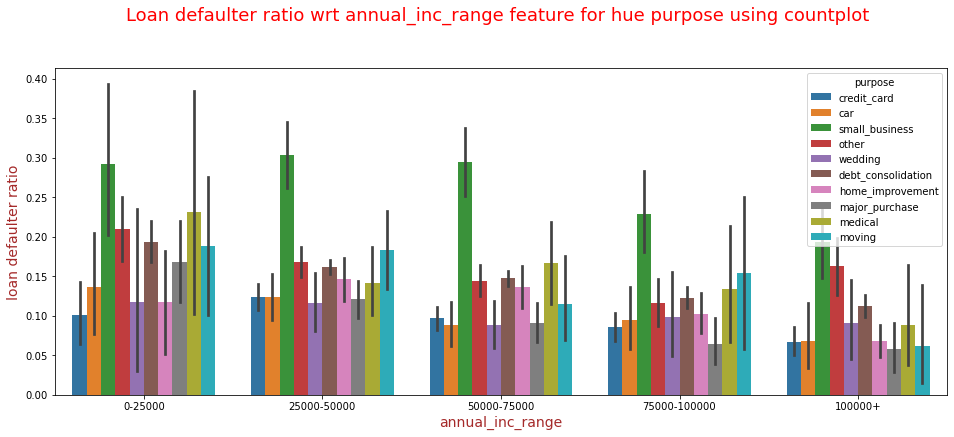

In [27]:
plotBivariateBar('annual_inc_range', 'purpose')

As we can infer from the plot that defaulter ratio decreases for every purpose with increase in the annual income.

* related -> YES

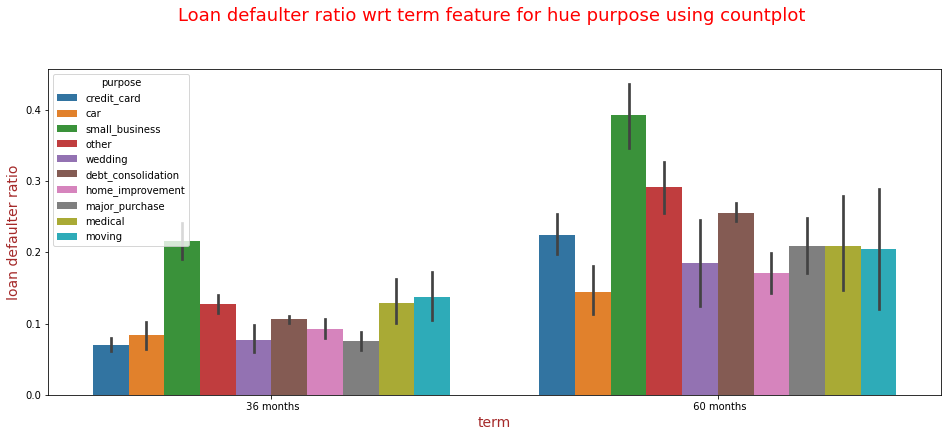

In [28]:
plotBivariateBar('term','purpose')

Here we can infer that defaulter ratio increases for every purpose with increase in the term of loan.

* related -> YES

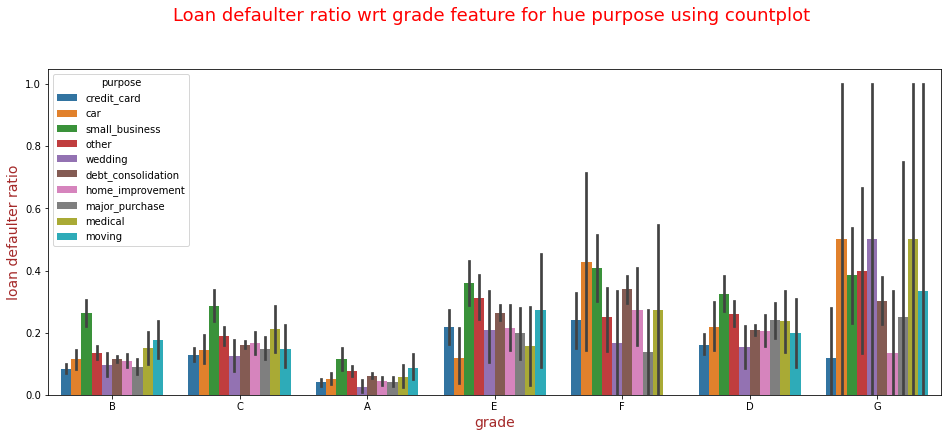

In [29]:
plotBivariateBar('grade','purpose')

Here we can infer from the plot that defaulter ratio increases for every purpose wrt grade.

* related -> YES

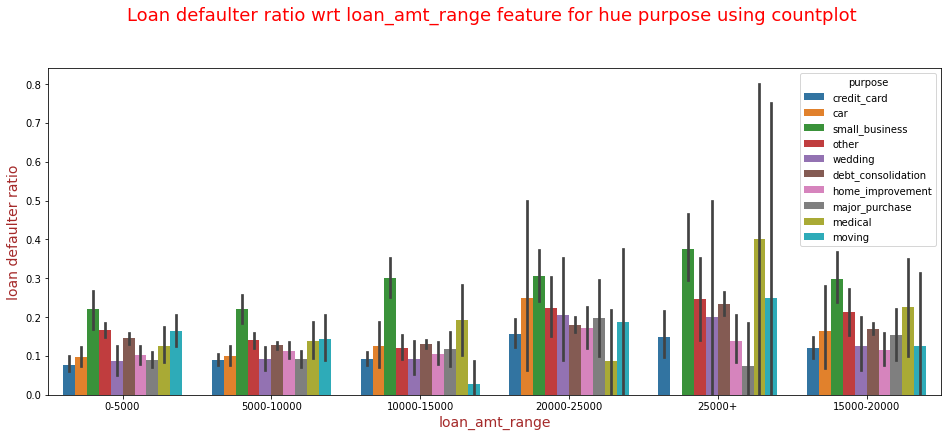

In [30]:
plotBivariateBar('loan_amt_range', 'purpose')

Here we can infer that default ratio increases for every purpose wrt loan amount range.

* related -> YES

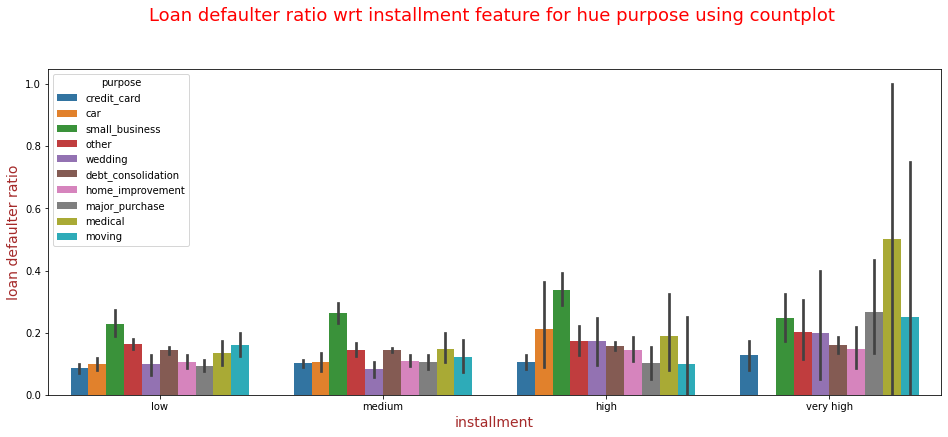

In [31]:
plotBivariateBar('installment','purpose')

Here we can infer from the plot that in general the defaulter ratio increases with increase in installment for every purpose. We can see that there is a good rise for medical and major purchase type.

* related -> YES

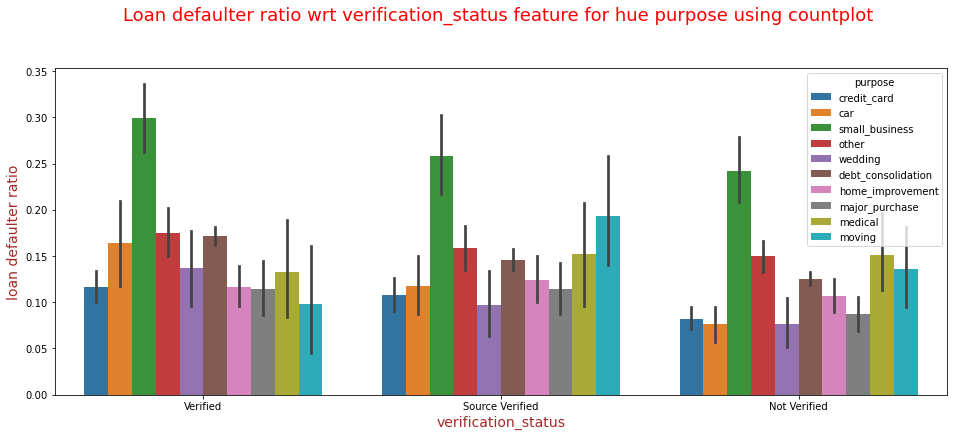

In [32]:
plotBivariateBar('verification_status','purpose')

Here we can infer that the defaulter ratio for every purpose is maximum in case of verified one's and minimum for not verified one's . We cannot make any specific correlation based on it because the number of not verified customers would be less than the verified one's for the bank.

* related -> NO

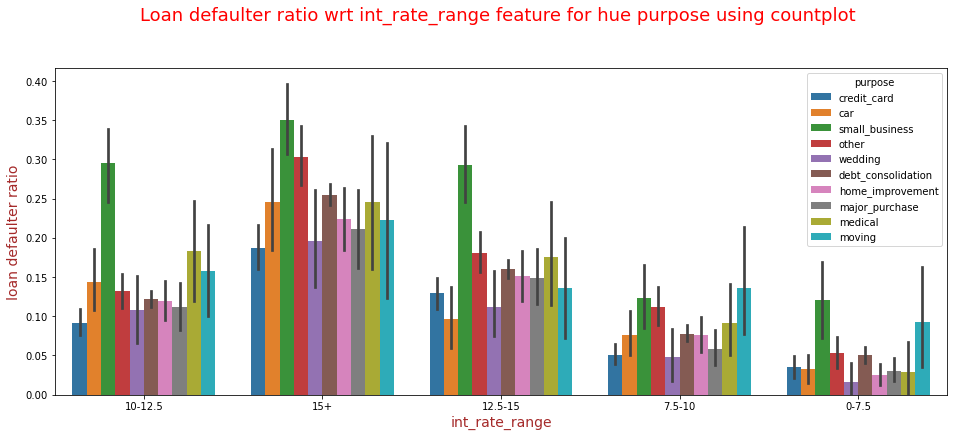

In [33]:
plotBivariateBar('int_rate_range','purpose')

Here we can infer that the defaulter ratio increases for every purpose as the interest rate increases.

* related -> YES

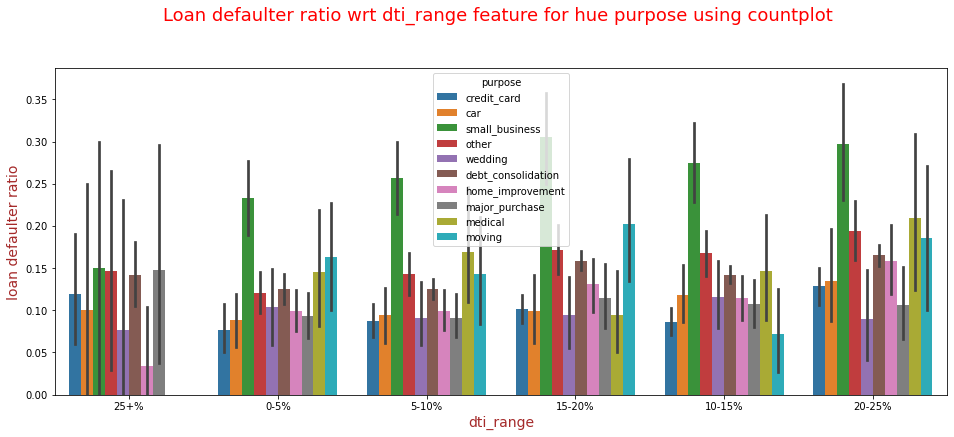

In [34]:
plotBivariateBar('dti_range','purpose')

Here we can infer that there is no specific correlation between defaulter ratio and dti_range.

* related -> NO

### 2. Compare every feature with defaulter ratio and hue as term

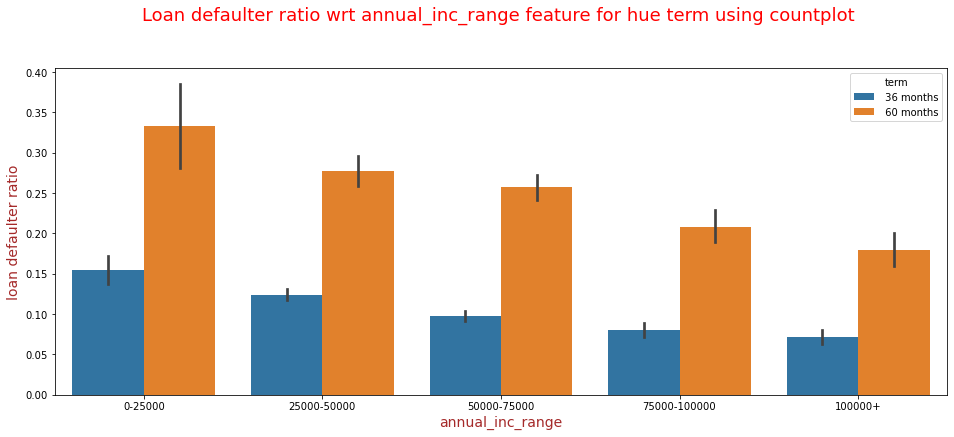

In [35]:
plotBivariateBar('annual_inc_range','term')

Here we can infer that defaulter ratio decrease with increase in annual income for every term loan.

* related -> YES

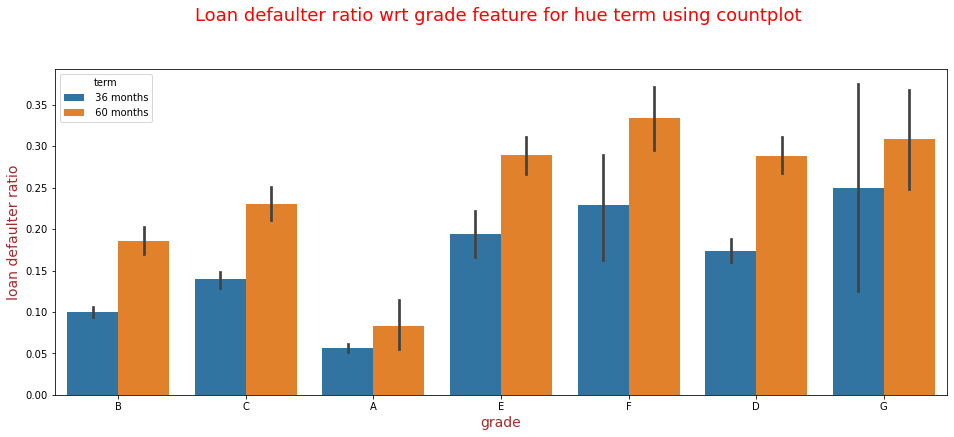

In [36]:
plotBivariateBar('grade','term')

Here we can infer that defaulter ratio increases for every term as we go from A-grade to G-grade.

* related -> YES

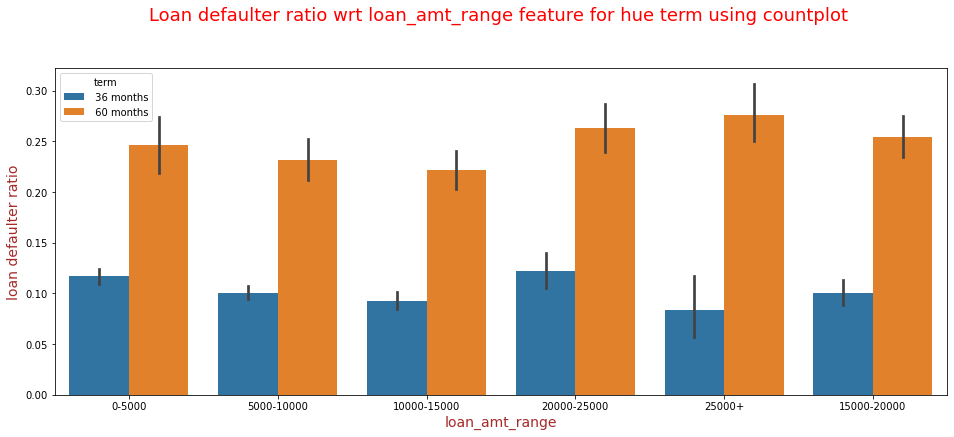

In [37]:
plotBivariateBar('loan_amt_range', 'term')

Here we cannot infer anything specific as there is no proper correlation between the two.

* related -> NO

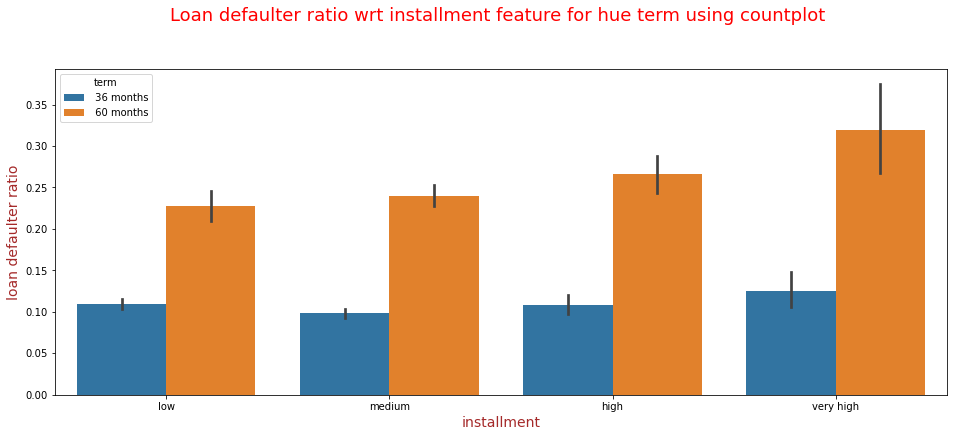

In [38]:
plotBivariateBar('installment','term')

Here from the plot we can infer that the defaulter ratio for every term increases with increase in the installment amount.

* related -> YES

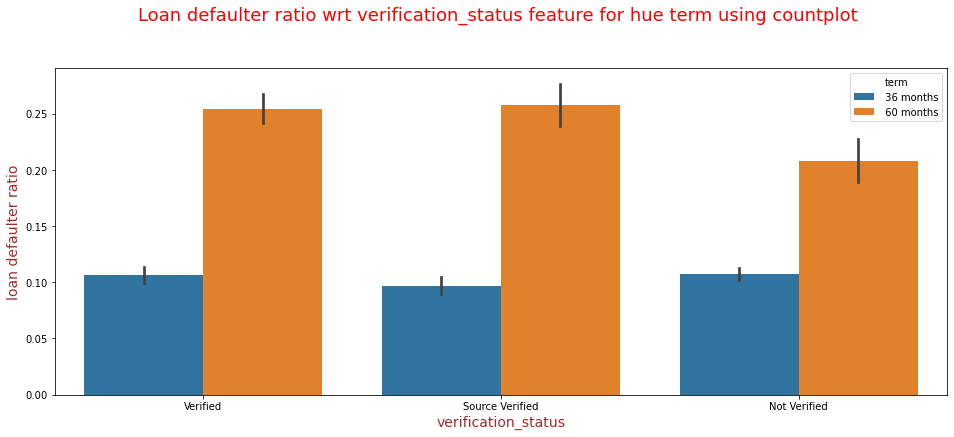

In [39]:
plotBivariateBar('verification_status','term')

We cannot infer any specific information from the above plot, because the defaulter ratio is mostly constant.

* related -> NO

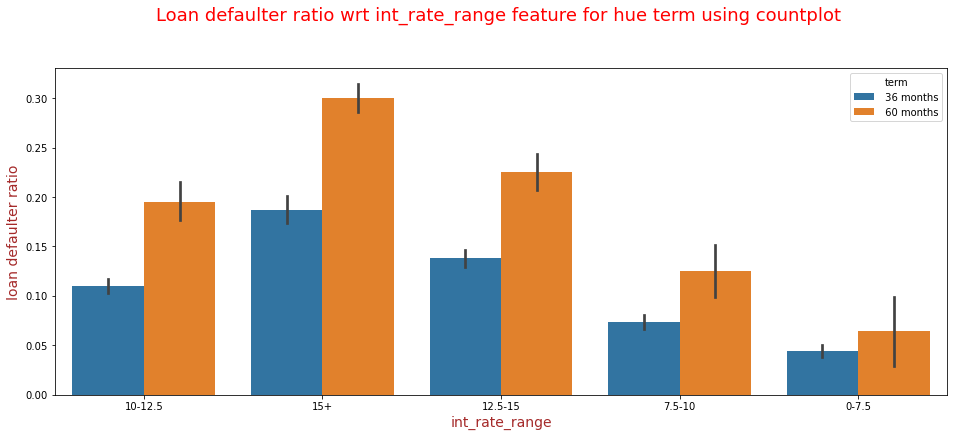

In [40]:
plotBivariateBar('int_rate_range','term')

Here from the plot we can say that defaulter ratio increases for every term with increase in interest rate.

* related -> YES

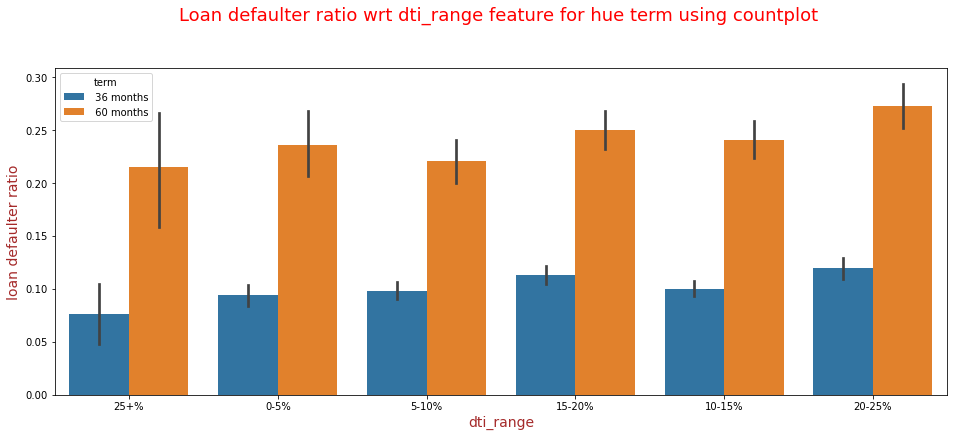

In [41]:
plotBivariateBar('dti_range','term')

Here we cannot infer anything from the plot as the defaulter ratio is mostly constant.

* related -> NO

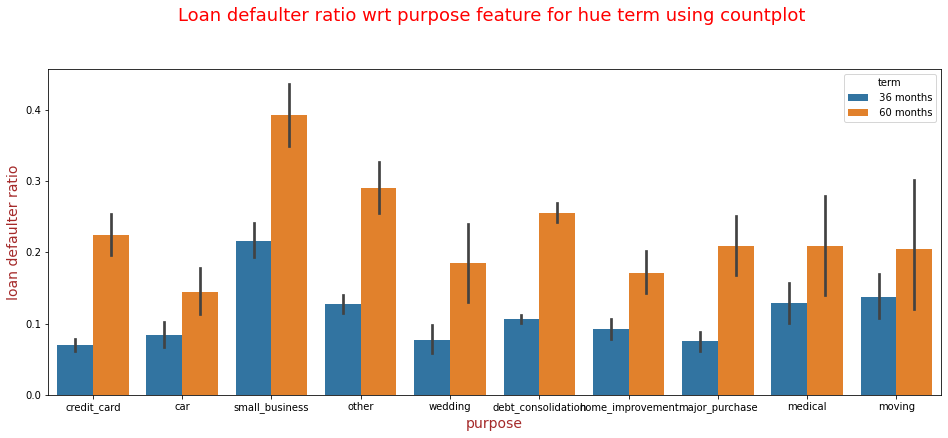

In [42]:
plotBivariateBar('purpose','term')

### 3. Compare every feature with default ratio and hue as installment

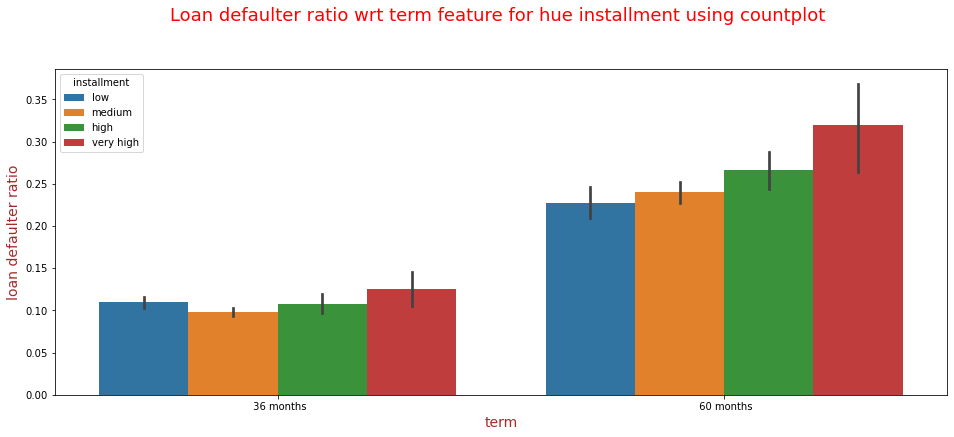

In [43]:
plotBivariateBar('term', 'installment')

Here we can infer that the loan default ratio increases for every type of installment with increase in the loan term.

* related -> YES

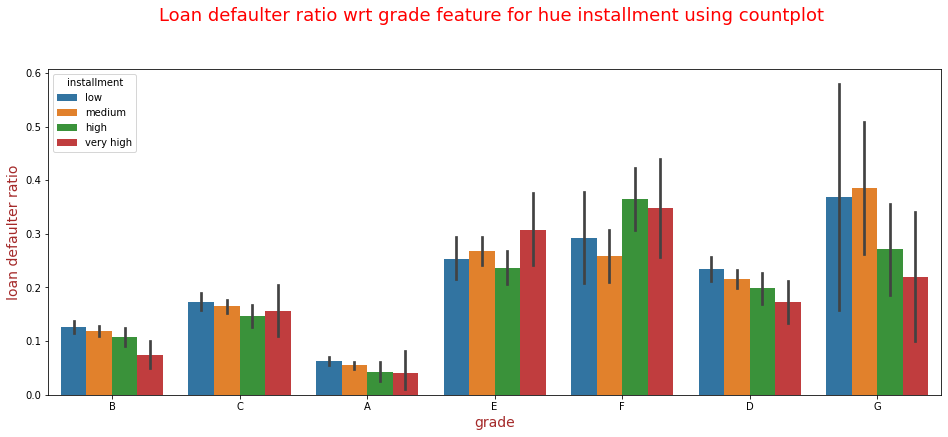

In [44]:
plotBivariateBar('grade','installment')

Here we see that defaulter ratio for every type of installment increases with change in loan grade.

* related -> YES

### Now we check some continuous features

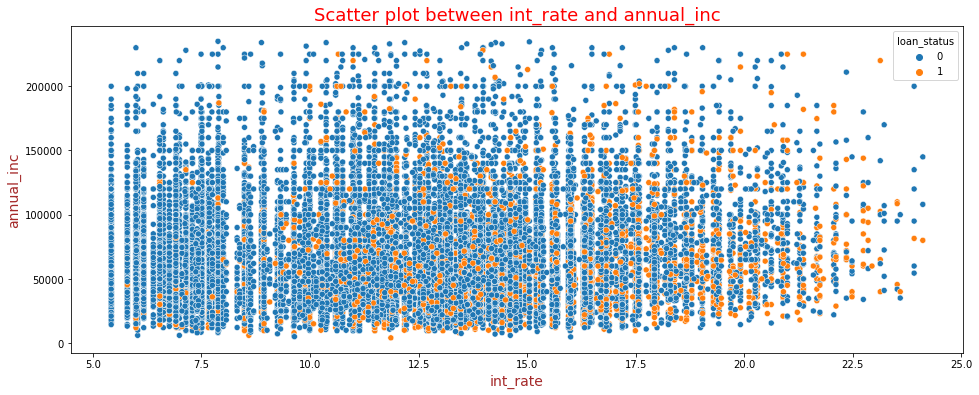

In [45]:
plotBivariateScatter('int_rate','annual_inc')

Here we can see straight lines in the plot, hence we can say there is no specific relation between the two features.

* related -> NO

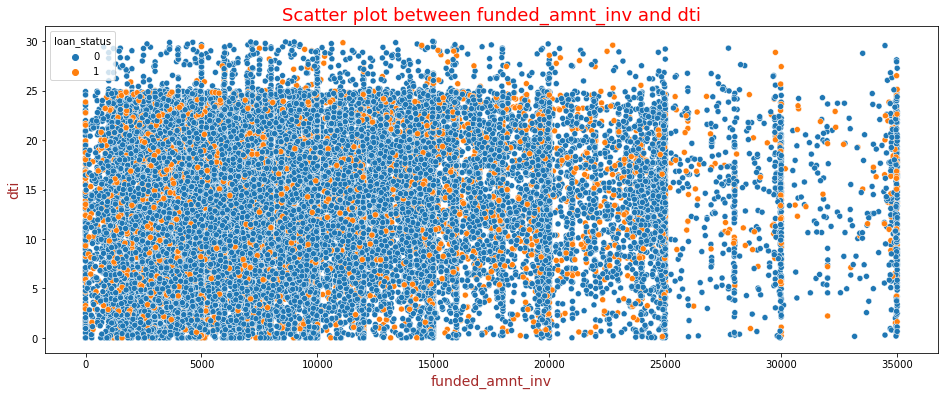

In [61]:
plotBivariateScatter('funded_amnt_inv','dti')

Here we can see some straight lines in the scatter plot, thus we can say there is no specific relation with defaulter ratio.

* related -> NO

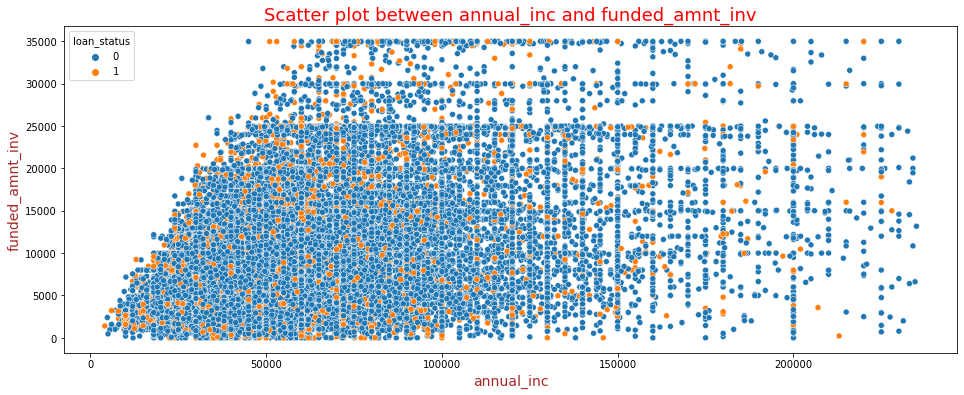

In [63]:
plotBivariateScatter('annual_inc','funded_amnt_inv')

Here we can see some slope pattern in the plot, we can say there is a positive correlation between the above two.

* related -> YES

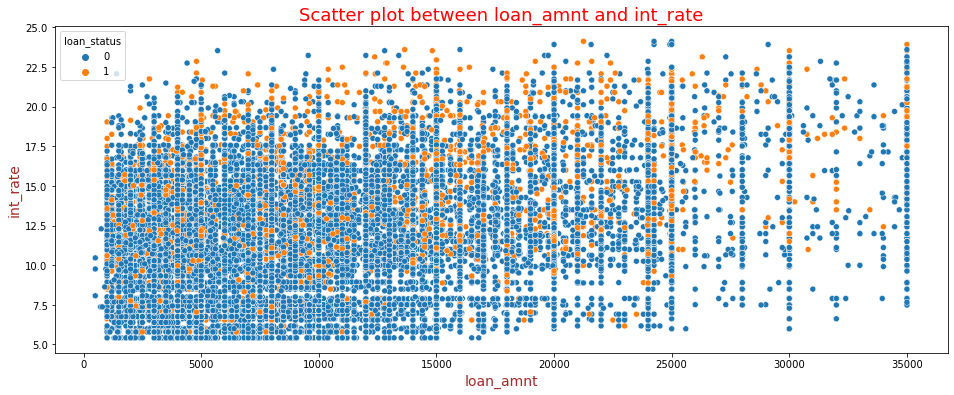

In [64]:
plotBivariateScatter('loan_amnt','int_rate')

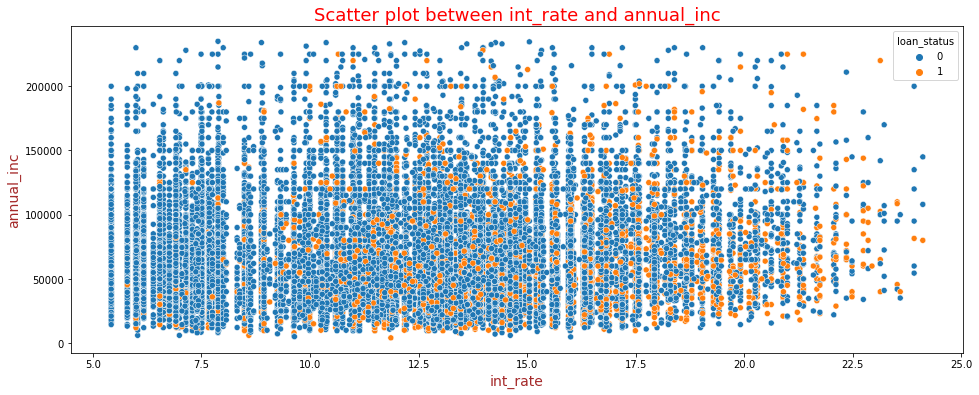

In [65]:
plotBivariateScatter('int_rate','annual_inc')

Here in the graph we can see that with increase in int rate the number of orange spots in the graph increases. Hence there is some correlation between the two.

* related -> YES

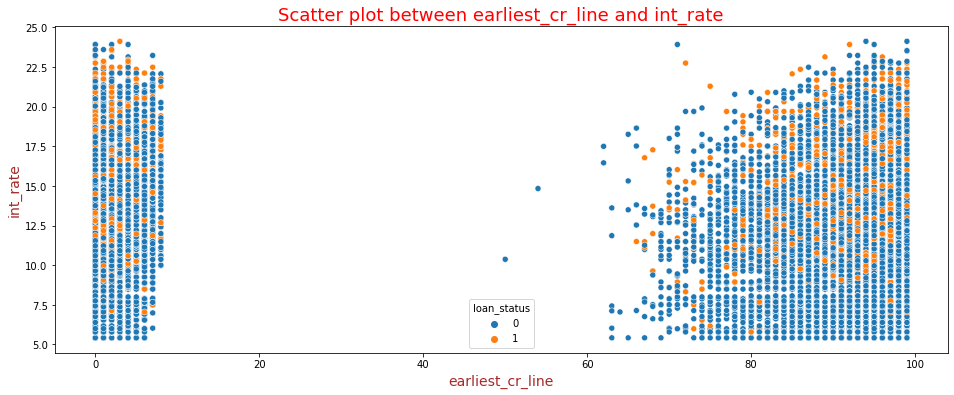

In [66]:
plotBivariateScatter('earliest_cr_line','int_rate')

Here we can see some pattern in the graph with some changes in the density of plot, there is some correlation between the two features.

* related -> YES

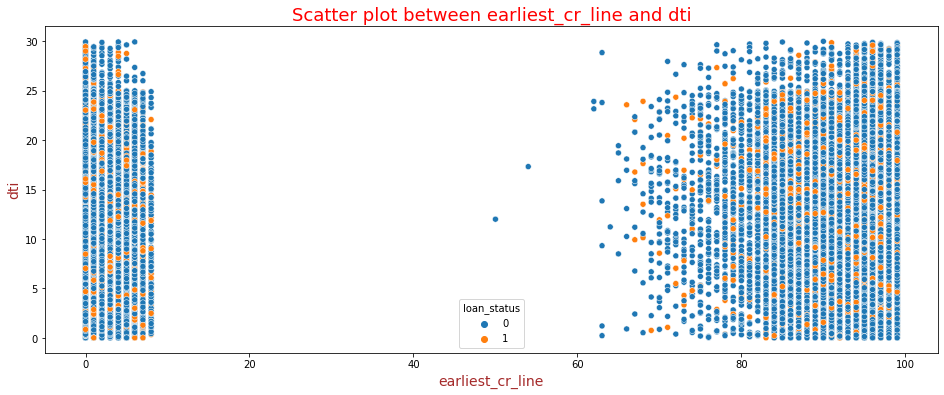

In [67]:
plotBivariateScatter('earliest_cr_line','dti')

Here in the plot we can see there are straight line patterns between the two features. Hence there is no specific correlation between the two features.

* Related -> NO

## Now we plot some boxplots and violin plots to compare the features

In [68]:
def plotBox(x,y,hue='loan_status',figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=x, y=y, data=df0, hue=hue, order=sorted(df0[x].unique()))
    plt.title('Box plot between '+x+' and '+y+' for each '+hue , fontdict={'fontsize':18, 'color':'brown'})
    plt.xlabel(x, fontdict={'fontsize':14, 'color':'red'})
    plt.ylabel(y, fontdict={'fontsize':14, 'color':'red'})
    plt.show()
    
    
    plt.figure(figsize=figsize)
    sns.violinplot(x=x, y=y, data=df0, hue=hue, order=sorted(df0[x].unique()))
    plt.title('Violin plot between '+x+' and '+y+' for each '+hue , fontdict={'fontsize':18, 'color':'brown'})
    plt.xlabel(x, fontdict={'fontsize':14, 'color':'red'})
    plt.ylabel(y, fontdict={'fontsize':14, 'color':'red'})
    plt.show()

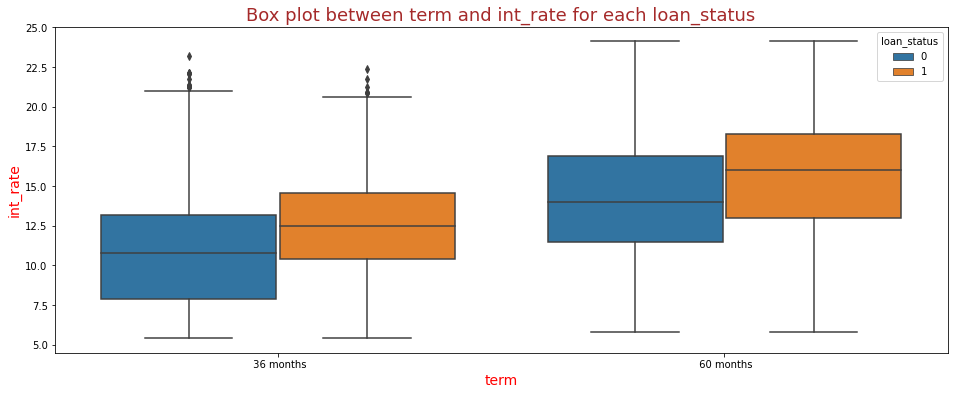

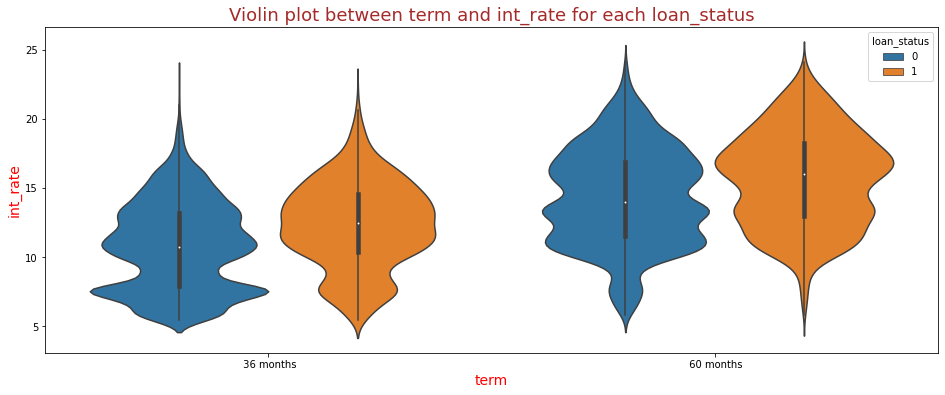

In [74]:
plotBox('term','int_rate')

Interest rate increases with term of the loan and the chances of default are also increasing here.

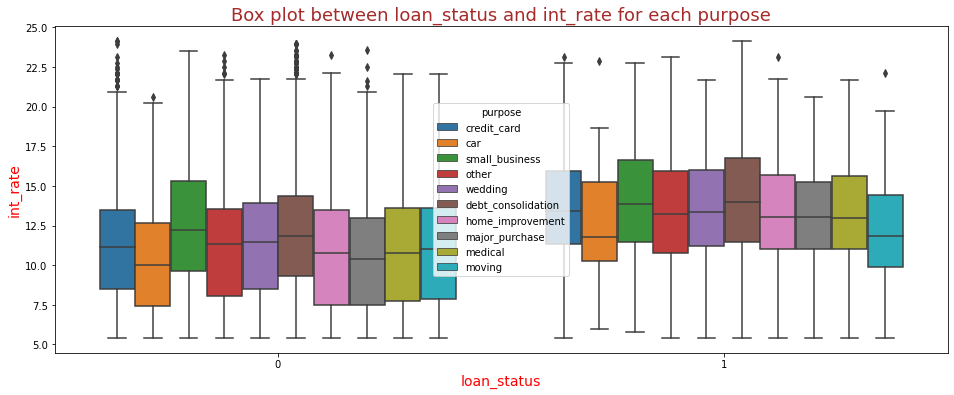

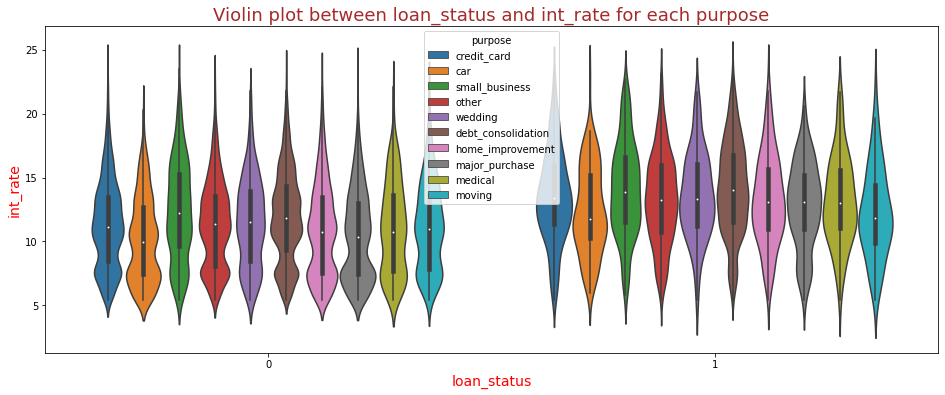

In [76]:
plotBox(x= 'loan_status',y= 'int_rate', hue='purpose')

Here we can see that interest rate is quite high for loans defaulted in case of every purpose

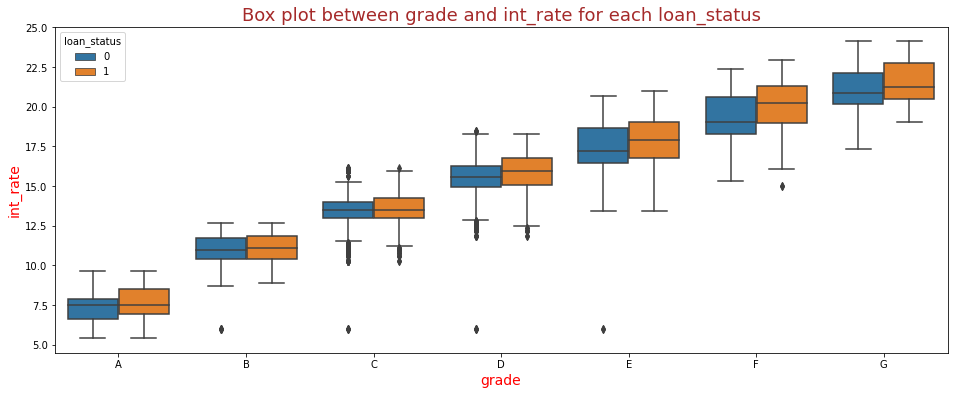

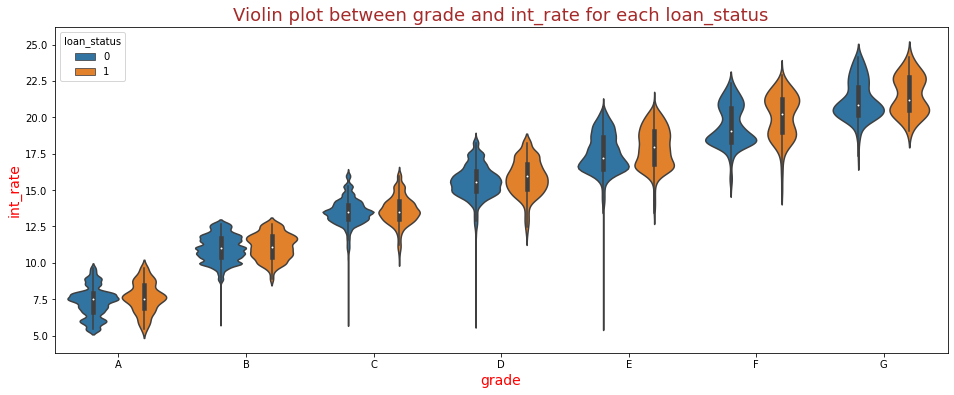

In [78]:
plotBox('grade','int_rate')

Here interest rate is increasing steadily with the grade and we can observe from the box plot that defaulters for every grade have 50% quantile value near to the 75% quantile value of interest rate.

## Conclutions of Bivariate Analysis:

After plotting some bivariate bar plots, scatter plots, box plots and violin plots comparing two variables with the loan defaulters, We can conclude that loan defaulters have some correlation with following parameters:

1. Term - The number of months of payments on the loan.
2. Annual Income - The annual income of the borrower.
3. Interest rate - The interest rate that is charged from the borrower.
4. Loan Amount - The total amount that is borrowed by the person.
5. Purpose - A category provided by the borrower for taking the loan.
6. Grade - LC assigned loan grade.
7. Installment - Monthly payment which has to be done by the borrower.
8. Revolving line utilization rate - The revol_util of the borrower.

# 3. Multivariate Analysis

In [101]:
## first we will plot a heat map to identify the relation between all the continuous features in the data.
cont_features = ['loan_amnt','int_rate','emp_length','annual_inc','dti','earliest_cr_line','revol_util','term','loan_status','term']

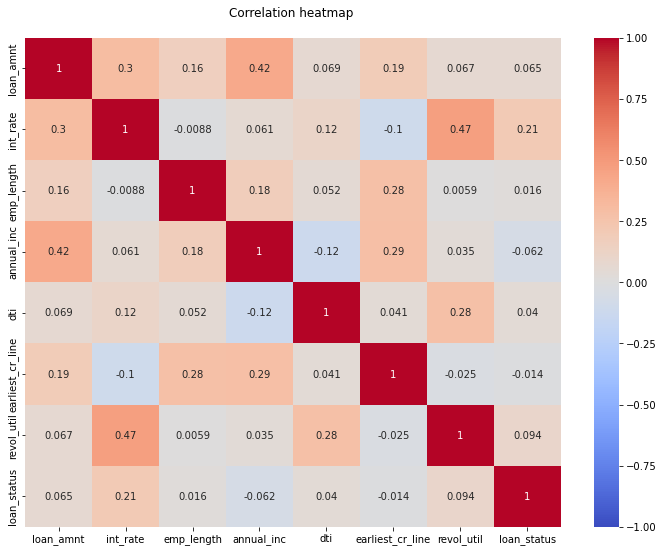

In [102]:
cor = df0[cont_features].corr()
plt.figure(figsize=(12,9))
sns.heatmap(cor, vmin= -1.0 , vmax= 1.0, annot=True, cmap='coolwarm') #cmap='coolwarm','YlGnBu' etc.
plt.title('Correlation heatmap \n')
plt.show()

From the above plotted correlation heatmap between continuous variables, We can see that loan_amnt, int_rate, annual_inc, revol_util, earliest_cr_line are highly correlated in nature.

### Conclusions of MultiVariate Analysis:

We can conclude from the heatmap that the correlation between following variables is large and defaulters ratio depends highly on them:
1. Loan Amount
2. Interest rate
3. Annual Income
4. Revolving line utilization rate
5. Earliest Credit line

* The above continuous features along with some categorical features term, grade, installment and purpose are defining parameters in our analysis.

# Final Findings:

After completion of Univariate, Bivariate and Multivariate analysis, we find that the best driving features for the loan default are:

1. Loan Amount
2. Interest Rate
3. Annual Income
4. Term
5. Installment
6. Grade
7. Purpose